# 강의 : https://www.edwith.org/boostcourse-ds-511/joinLectures/40395
# 강의자 repo : https://github.com/corazzon/boostcourse-ds-511

# 1.2 의사결정나무로 간단한 분류 예측 모델 만들기

In [1]:
!git clone https://github.com/corazzon/boostcourse-ds-511.git
!ls

Cloning into 'boostcourse-ds-511'...
remote: Enumerating objects: 67, done.
remote: Counting objects: 100% (67/67), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 67 (delta 32), reused 49 (delta 16), pack-reused 0
Unpacking objects: 100% (67/67), done.
boostcourse-ds-511  sample_data


In [2]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree, export_graphviz
from sklearn.metrics import  accuracy_score

import graphviz
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 1.2.1 당뇨병 데이터 로드 및 확인
Kaggle - Pima Indians Diabetes Database (https://www.kaggle.com/uciml/pima-indians-diabetes-database)

In [3]:
diabetes_df = pd.read_csv('boostcourse-ds-511/data/diabetes.csv')
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
diabetes_df.info()

print('\n\n>>> Number of  Null values in each column')
diabetes_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


>>> Number of  Null values in each column


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## 1.2.2. 학습과 예측을 위한 데이터셋 만들기
- train dataset, validation dataset
- 80:20 sequential split

In [5]:
split_idx = int(diabetes_df.shape[0] * 0.8)

train = diabetes_df[:split_idx]
validation = diabetes_df[split_idx:]

print('train shape :', train.shape)
display(train.head(3))
print('\nvalidation shape :', validation.shape)
display(validation.head(3))

train shape : (614, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1



validation shape : (154, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
614,11,138,74,26,144,36.1,0.557,50,1
615,3,106,72,0,0,25.8,0.207,27,0
616,6,117,96,0,0,28.7,0.157,30,0


In [6]:
feature_names = train.columns[:-1]
label_name = train.columns[-1]
print('>>> feature_names :', feature_names)
print('>>> label_name :', label_name)
print()

def split_xy(df, label_name):
  X = df.drop(columns=label_name)
  y = df[label_name]
  return X, y

X_train, y_train = split_xy(train, label_name=label_name)
X_val, y_val = split_xy(validation, label_name=label_name)

print('>>> shape of X_train, y_train :', X_train.shape, y_train.shape)
print('>>> shape of X_val, y_val :', X_val.shape, y_val.shape)
print()
display(X_train.head(3), y_train.head(3))

>>> feature_names : Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')
>>> label_name : Outcome

>>> shape of X_train, y_train : (614, 8) (614,)
>>> shape of X_val, y_val : (154, 8) (154,)



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32


0    1
1    0
2    1
Name: Outcome, dtype: int64

## 1.2.3 의사결정나무로 학습과 예측하기
- model train & predict

In [7]:
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [8]:
y_pred = model.predict(X_val)
y_pred

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0])

## 1.2.4 예측한 모델의 성능 측정하기
- plot tree, graphviz
- feature importance
- accuracy score

### 1.2.4.1 트리 시각화(sklearn API)

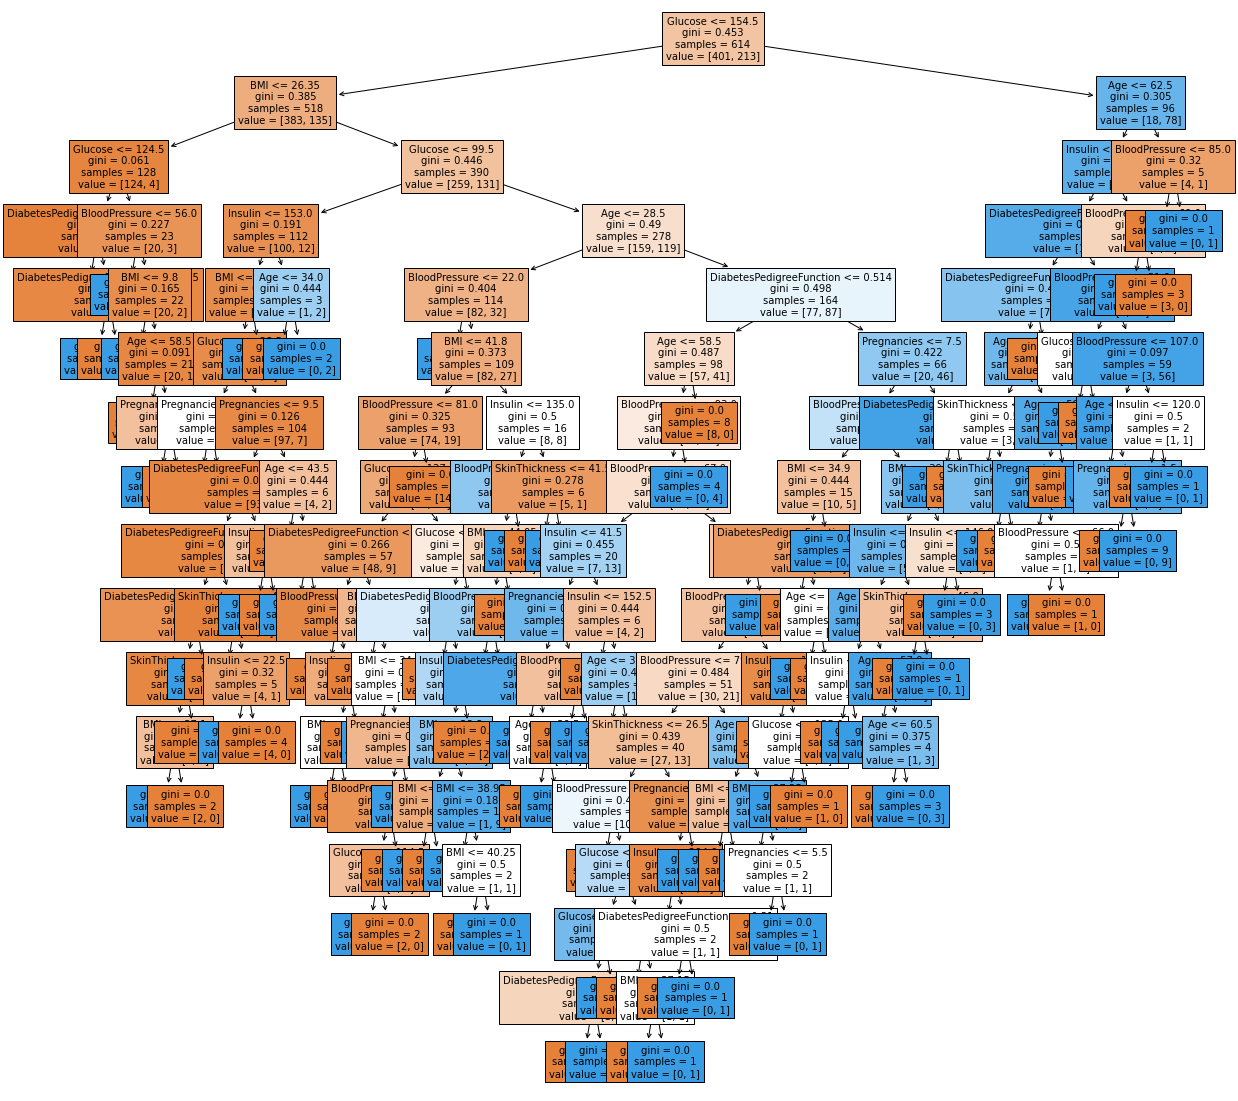

In [9]:
plt.figure(figsize=(20, 20))
plot = plot_tree(model, feature_names=feature_names, filled=True, fontsize=10)
plt.show()

### 1.2.4.2 트리 시각화(graphviz API)

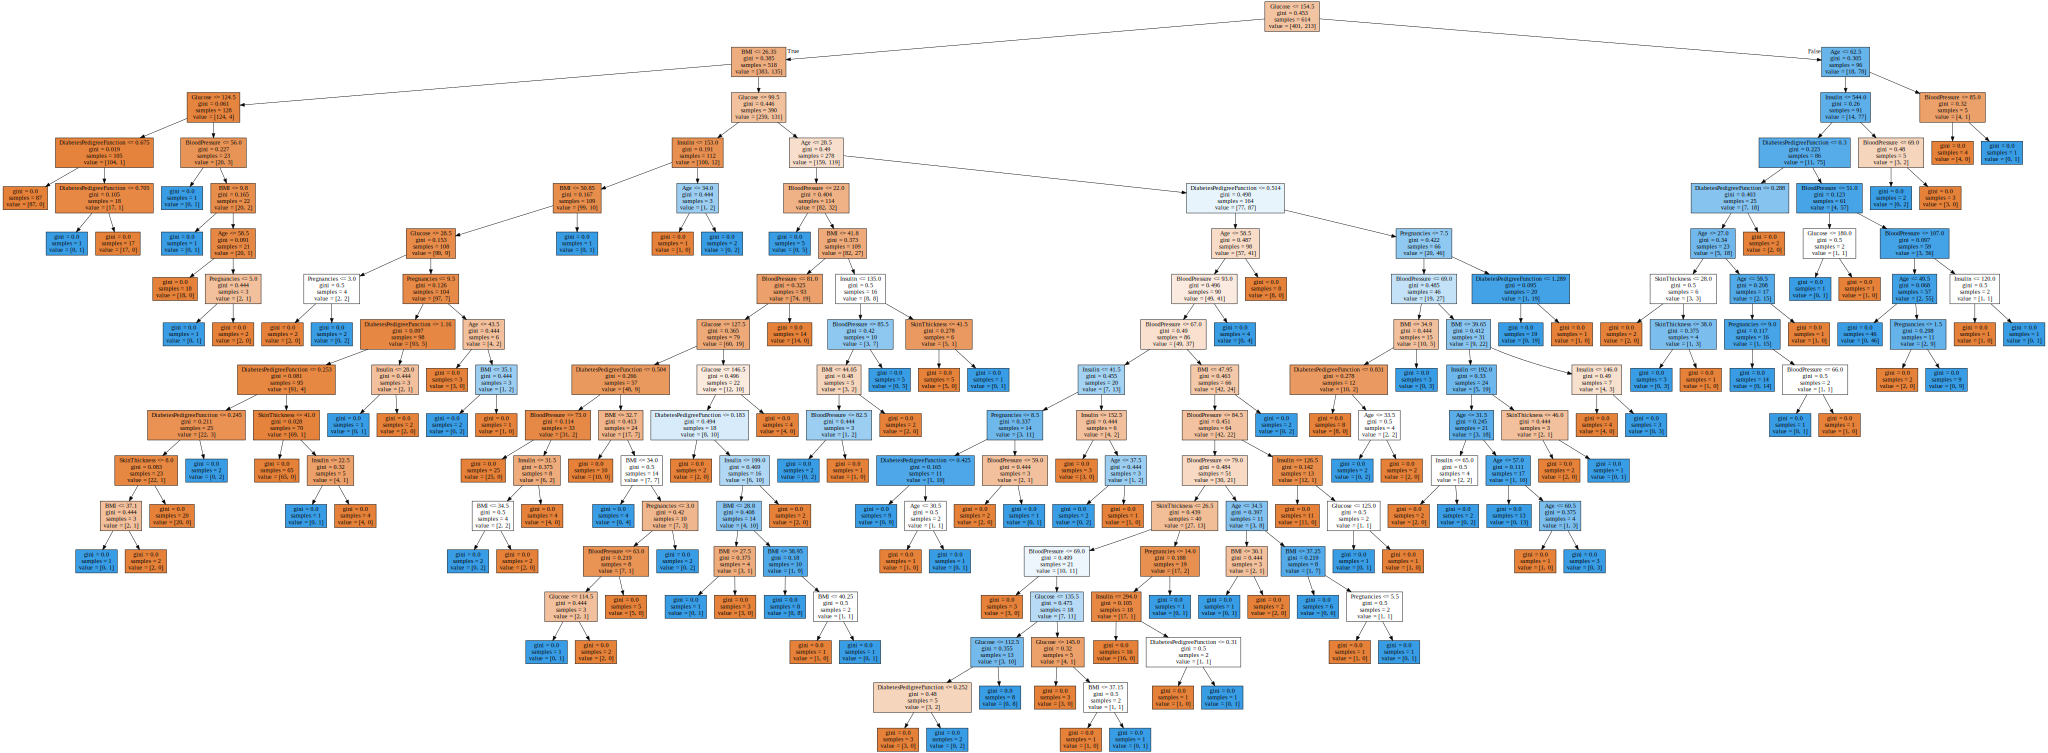

In [10]:
# Visualize Decision Tree using graphviz
dot = export_graphviz(model, feature_names=feature_names, filled=True)
display(graphviz.Source(dot))

### 1.2.4.3 속성 중요도(feature importnace) 시각화

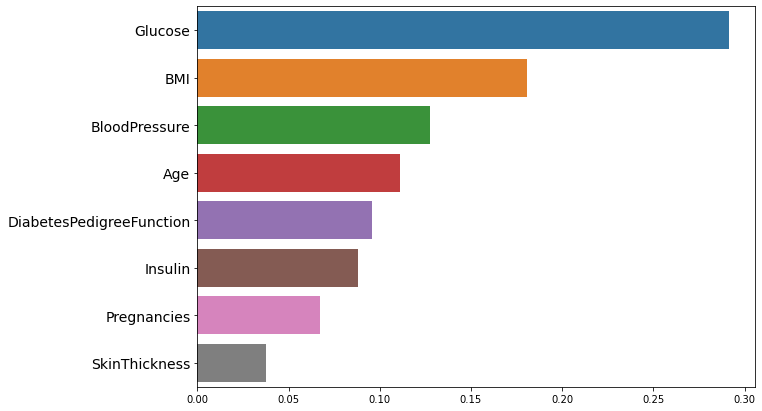

In [11]:
# Visualize feature importance
ftr_importance_df = pd.Series( model.feature_importances_, index=feature_names ).sort_values(ascending=False)

plt.figure(figsize=(10, 7))
sns.barplot(x = ftr_importance_df.values, y=ftr_importance_df.index)
plt.yticks(fontsize=14)
plt.show()

### 1.2.4.4 성능 측정(accuracy score)

In [12]:
# Accuracy score
print((y_val == y_pred).sum() / y_val.shape[0] * 100)

# Accuracy score using API
print(accuracy_score(y_val, y_pred) * 100)

# Accuracy score using class method
print(model.score(X_val, y_val) * 100)

74.67532467532467
74.67532467532467
74.67532467532467
